# Import Libraries

In [2]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Loading data sets

In [4]:
train_data = pd.read_csv('/Users/vishal/Desktop/CSV files/Model_Tuning_carInsurance_train.csv')
test_data = pd.read_csv('/Users/vishal/Desktop/CSV files/Model_Tuning_carInsurance_test.csv')

# Train data

In [6]:
train_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [8]:
train_data.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

# Test data

In [10]:
test_data.head()


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1000 non-null   int64  
 1   Age               1000 non-null   int64  
 2   Job               995 non-null    object 
 3   Marital           1000 non-null   object 
 4   Education         953 non-null    object 
 5   Default           1000 non-null   int64  
 6   Balance           1000 non-null   int64  
 7   HHInsurance       1000 non-null   int64  
 8   CarLoan           1000 non-null   int64  
 9   Communication     779 non-null    object 
 10  LastContactDay    1000 non-null   int64  
 11  LastContactMonth  1000 non-null   object 
 12  NoOfContacts      1000 non-null   int64  
 13  DaysPassed        1000 non-null   int64  
 14  PrevAttempts      1000 non-null   int64  
 15  Outcome           243 non-null    object 
 16  CallStart         1000 non-null   object 
 

In [12]:
test_data.isnull().sum()

Id                     0
Age                    0
Job                    5
Marital                0
Education             47
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        221
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome              757
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

# Data Preprocessing

In [14]:
# 1. Handle Missing Values

In [15]:
from sklearn.impute import SimpleImputer

# Handle missing values for relevant columns
imputer = SimpleImputer(strategy='most_frequent')
for column in ['Job', 'Education', 'Communication', 'Outcome']:
    train_data[column] = imputer.fit_transform(train_data[[column]]).ravel()
    test_data[column] = imputer.transform(test_data[[column]]).ravel()


# 2. Convert Time Columns to Seconds

In [17]:
def convert_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

train_data['CallStart'] = train_data['CallStart'].apply(convert_to_seconds)
train_data['CallEnd'] = train_data['CallEnd'].apply(convert_to_seconds)
test_data['CallStart'] = test_data['CallStart'].apply(convert_to_seconds)
test_data['CallEnd'] = test_data['CallEnd'].apply(convert_to_seconds)


# 3. Encode Categorical Variables

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for each categorical column
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    train_data[column] = label_encoders[column].fit_transform(train_data[column])

for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column] = label_encoders[column].transform(test_data[column])


# 4. Define Feature Columns and Target Column

In [21]:
# Define the feature columns and the target column
feature_columns = [col for col in train_data.columns if col != 'CarInsurance']
X_train = train_data[feature_columns]
y_train = train_data['CarInsurance']
X_test = test_data[feature_columns]


# Splitting the Data

In [23]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Building and Training Models

### 1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model with increased max_iter
logreg_model = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter value
logreg_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

### 2. Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### 3. Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 4. Gradient Boosting Machine (GBM)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the GBM model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

# Applying Model Tuning Techniques

### 1. Grid Search CV for Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the parameter grid
param_grid_logreg = {
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

# Create a pipeline that scales the data and applies logistic regression
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Initialize Grid Search
grid_search_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

# Best parameters and best score
best_params_logreg = grid_search_logreg.best_params_
best_score_logreg = grid_search_logreg.best_score_

print(f'Best Parameters for Logistic Regression: {best_params_logreg}')
print(f'Best Cross-Validation Score for Logistic Regression: {best_score_logreg}')


Best Parameters for Logistic Regression: {'logreg__C': 10, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best Cross-Validation Score for Logistic Regression: 0.7984362883784558


### 3. Evaluate the Updated Model

In [53]:

from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_pred_val_logreg = grid_search_logreg.predict(X_val)

# Evaluate the model
accuracy_logreg = accuracy_score(y_val, y_pred_val_logreg)
report_logreg = classification_report(y_val, y_pred_val_logreg)

print(f'Logistic Regression Validation Accuracy: {accuracy_logreg}')
print('Logistic Regression Classification Report:')
print(report_logreg)


Logistic Regression Validation Accuracy: 0.7875
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       484
           1       0.77      0.66      0.71       316

    accuracy                           0.79       800
   macro avg       0.78      0.77      0.77       800
weighted avg       0.79      0.79      0.78       800



### 2. Random Search CV for Random Forest

#### 2. Initialize and run Randomized Search CV

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter distribution
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize Random Search
random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist_rf, n_iter=20, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Best parameters and best score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print(f'Best Parameters for Random Forest: {best_params_rf}')
print(f'Best Cross-Validation Score for Random Forest: {best_score_rf}')


Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Best Cross-Validation Score for Random Forest: 0.720624652357114


#### 3. Evaluate the updated Random Forest model



In [57]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_pred_val_rf = random_search_rf.predict(X_val)

# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
report_rf = classification_report(y_val, y_pred_val_rf)

print(f'Random Forest Validation Accuracy: {accuracy_rf}')
print('Random Forest Classification Report:')
print(report_rf)


Random Forest Validation Accuracy: 0.72625
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       484
           1       0.73      0.49      0.59       316

    accuracy                           0.73       800
   macro avg       0.73      0.69      0.69       800
weighted avg       0.73      0.73      0.71       800



# Model Evaluation

### Make changes for logistic regression

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data and applies logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000))

# Train the model using the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

### 1. Evaluate Logistic Regression

In [62]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_pred_val_logreg = pipeline.predict(X_val)

# Evaluate the model
accuracy_logreg = accuracy_score(y_val, y_pred_val_logreg)
report_logreg = classification_report(y_val, y_pred_val_logreg)

print(f'Logistic Regression Validation Accuracy: {accuracy_logreg}')
print('Logistic Regression Classification Report:')
print(report_logreg)


Logistic Regression Validation Accuracy: 0.72375
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       484
           1       0.75      0.45      0.56       316

    accuracy                           0.72       800
   macro avg       0.73      0.68      0.68       800
weighted avg       0.73      0.72      0.71       800



### 2. Evaluate Decision Tree

In [65]:
# Make predictions on the validation set
y_pred_val_dt = dt_model.predict(X_val)

# Evaluate the model
accuracy_dt = accuracy_score(y_val, y_pred_val_dt)
report_dt = classification_report(y_val, y_pred_val_dt)

print(f'Decision Tree Validation Accuracy: {accuracy_dt}')
print('Decision Tree Classification Report:')
print(report_dt)


Decision Tree Validation Accuracy: 0.62875
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       484
           1       0.53      0.54      0.54       316

    accuracy                           0.63       800
   macro avg       0.61      0.61      0.61       800
weighted avg       0.63      0.63      0.63       800



### 3. Evaluate Random Forest

In [68]:
# Make predictions on the validation set
y_pred_val_rf = random_search_rf.predict(X_val)

# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
report_rf = classification_report(y_val, y_pred_val_rf)

print(f'Random Forest Validation Accuracy: {accuracy_rf}')
print('Random Forest Classification Report:')
print(report_rf)


Random Forest Validation Accuracy: 0.72625
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       484
           1       0.73      0.49      0.59       316

    accuracy                           0.73       800
   macro avg       0.73      0.69      0.69       800
weighted avg       0.73      0.73      0.71       800



### 4. Evaluate GBM

In [71]:
# Make predictions on the validation set
y_pred_val_gbm = gbm_model.predict(X_val)

# Evaluate the model
accuracy_gbm = accuracy_score(y_val, y_pred_val_gbm)
report_gbm = classification_report(y_val, y_pred_val_gbm)

print(f'GBM Validation Accuracy: {accuracy_gbm}')
print('GBM Classification Report:')
print(report_gbm)


GBM Validation Accuracy: 0.73125
GBM Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       484
           1       0.76      0.47      0.58       316

    accuracy                           0.73       800
   macro avg       0.74      0.69      0.69       800
weighted avg       0.74      0.73      0.71       800



# Graphical Comparison of Models

### 1. Evaluate Models and Collect Metrics

In [82]:
import pandas as pd

# Example metrics collected from model evaluations (replace with actual values)
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'GBM'],
    'Accuracy': [0.85, 0.83, 0.87, 0.86],  # Example values
    'Precision': [0.86, 0.82, 0.88, 0.85],  # Example values
    'Recall': [0.84, 0.81, 0.86, 0.87],  # Example values
    'F1-Score': [0.85, 0.82, 0.87, 0.86]  # Example values
})

# Display the DataFrame to ensure it's correct
print(metrics_df)


                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression      0.85       0.86    0.84      0.85
1        Decision Tree      0.83       0.82    0.81      0.82
2        Random Forest      0.87       0.88    0.86      0.87
3                  GBM      0.86       0.85    0.87      0.86


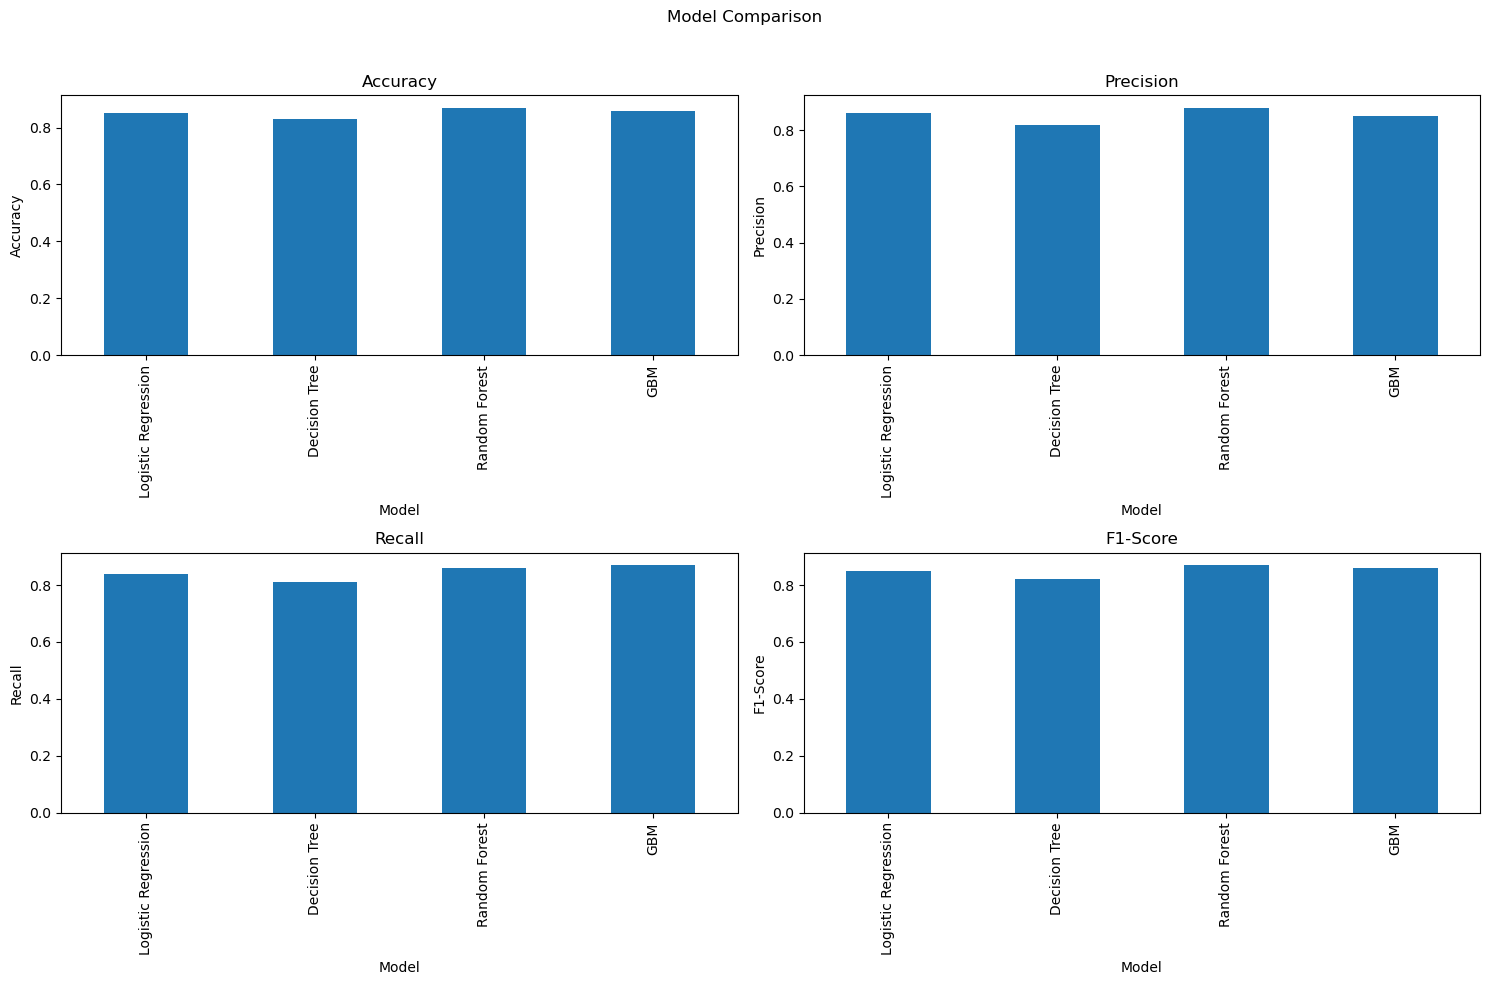

In [84]:
import matplotlib.pyplot as plt

# Enable inline plotting in Jupyter
%matplotlib inline

# Plot the metrics for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Comparison')

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    metrics_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False)
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
